In [10]:
import os
import json
import earthpy as et
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas
from scipy.stats import norm, gamma, f, chi2
import IPython.display as disp
%matplotlib inline

# change the global options that Geopandas inherits from
pd.set_option('display.max_columns',None)

In [11]:
# Change directory to landslide-detect data path
data_path = os.path.join(et.io.HOME, "earth-analytics", "landslide-detect")
if os.path.exists(data_path):
    os.chdir(data_path)
else:
    os.makedirs(data_path)
    print('The new directory is created!')
    os.chdir(data_path)

print('Current working directory is set to: ', os.getcwd())

Current working directory is set to:  /Users/leahmanak/earth-analytics/landslide-detect


In [12]:
def create_dataframe(data_file):
    """
    Reads a csv file into a Pandas DataFrame. Sets the index to the 'slide.id'
    and sorts the DataFrame by the new index. Creates a new column 'point' by 
    merging two other columns.

    Parameters
    ----------
    data_file : str

    Returns
    -------
    dataframe
        sorted by index
    """

    df = pd.read_csv(data_file, index_col='slide.id').sort_values(by='slide.id')
    df['point'] = df['lon'].map(str) + ', ' + df['lat'].map(str)

    # conditional to determine the large landslides from the rest
    df.loc[df['size'] == 'large', 'large_slide'] = 'True'  
    df.loc[df['size'] != 'large', 'large_slide'] = 'False'

    return df

landslide_df = create_dataframe('landslides.verified.csv')
landslide_df.head()

,slide.date,location,type,trigger,size,lon,lat,location_accuracy,event_title,admin_division_name,ge.lat,ge.lon,is.exact,slide.index,point,large_slide
slide.id,,,,,,,,,,,,,,,,
7392,2015-12-13T19:45:00Z,Interstate 5 in the Fort Tejon area,mudslide,downpour,medium,-118.896200,34.881300,10km,Interstate 5 in the Fort Tejon area,California,NaN,NaN,False,17,"-118.8962, 34.8813",False
7534,2015-11-29T00:00:00Z,Near the twin bridges on the Tryon side of 176,rock_fall,rain,medium,-82.321600,35.220700,5km,Near the twin bridges on the Tryon side of 176,North Carolina,NaN,NaN,False,48,"-82.3216, 35.2207",False
7536,2016-02-16T15:00:00Z,Tyee Access Road,rock_fall,rain,medium,-123.568400,43.433000,1km,Tyee Access Road,Oregon,43.433000,-123.568400,True,69,"-123.5684, 43.433",False
7538,2016-01-07T05:55:00Z,Highway 140 between El Portal and Yosemite Va...,rock_fall,rain,medium,-119.724608,37.698564,25km,Highway 140 between El Portal and Yosemite Va...,California,37.698564,-119.724608,True,64,"-119.72460833333334, 37.69856388888888",False
7555,2016-03-11T00:00:00Z,Route 1 north of Westport,landslide,rain,medium,-123.797464,39.694056,exact,Route 1 north of Westport,California,39.694056,-123.797464,True,66,"-123.79746388888888, 39.69405555555555",False


In [13]:
for id, location, point in zip(landslide_df.index,
                               landslide_df['location'],
                               landslide_df['point'],
                               ):
    try: 
        print(id, location, point)
    except: 
        print("something went wrong")


7392 Interstate 5 in the Fort Tejon area -118.8962, 34.8813
7534 Near the twin bridges on the Tryon side of 176 -82.3216, 35.2207
7536 Tyee Access Road -123.5684, 43.433
7538 Highway 140  between El Portal and Yosemite Valley -119.72460833333334, 37.69856388888888
7555 Route 1 north of Westport -123.79746388888888, 39.69405555555555
7556 Occidental Road at Green Hill Road -122.92474444444444, 38.51403333333333
7564 Pulga -121.4519, 39.7958
7568 Annapolis Rd 2 �_ miles in from State Hwy 1 -123.3974, 38.7164
7569 Stewarts Point-Skaggs Springs Rd -123.3792, 38.6498
7570 Westside Rd near Hacienda -122.92474444444444, 38.51403333333333
7572 Calistoga Rd near Gates Rd -122.65055, 38.53228055555555
7672 train tracks in Borderland -82.3079, 37.7123
7735 Blue River Street close to the intersection with Oldham Street -94.5226, 38.9913
7737 Logan Pass -113.7718, 48.7489
7754 Kelso -122.9199, 46.2128
7755 Skykomish -121.225, 47.717
7757 Edmonds -122.38052777777776, 47.70679444444445
7760 Burien -1

In [21]:
#convert df to geopandas dataframe
landslide_gdf = geopandas.GeoDataFrame(
    landslide_df, geometry=geopandas.points_from_xy(
        landslide_df.lon, landslide_df.lat))
print(landslide_gdf.head())

                    slide.date  \
slide.id                         
7392      2015-12-13T19:45:00Z   
7534      2015-11-29T00:00:00Z   
7536      2016-02-16T15:00:00Z   
7538      2016-01-07T05:55:00Z   
7555      2016-03-11T00:00:00Z   

                                                   location       type  \
slide.id                                                                 
7392                    Interstate 5 in the Fort Tejon area   mudslide   
7534         Near the twin bridges on the Tryon side of 176  rock_fall   
7536                                       Tyee Access Road  rock_fall   
7538      Highway 140  between El Portal and Yosemite Va...  rock_fall   
7555                              Route 1 north of Westport  landslide   

           trigger    size         lon        lat location_accuracy  \
slide.id                                                              
7392      downpour  medium -118.896200  34.881300              10km   
7534          rain  medium  -

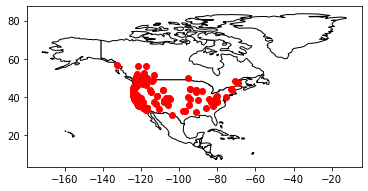

In [31]:
# plot geodataframe to test 
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')
landslide_gdf.plot(ax=ax, color='red')

plt.show()

In [32]:

# parse dates, specify datetime object by column on import

# function runs on a row, use dataframe.apply(axis=row is 1, col is 2) **No for loop needed
# add start and stop column
# time.delta()

In [33]:
def image_search(geodataframe, start, stop):
    """
    Iterates through a pandas DataFrame to identify specific parameters of
    center AOI point, start time, and stop time.
    
    Parameters
    ----------
    data_file : dataframe

    Returns
    -------
    dataframe
    
    """

    # df_series: 'point' + df_series: 'location_accuracy' in all directions
    # start = slide.date - some time in days
    # stop = start + some time in days

    # loop over dataframe to search on each point, start, and stop



    return point, start, stop
    
        

In [34]:
#iterate over each row
#https://stackoverflow.com/questions/58455054/python-pandas-apply-function-using-column-names-as-named-arguments

In [40]:
# Data search in Google Earth Engine

for point, start, stop in _________:
    im_coll = (ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT')
                    .filterBounds(point)
                    .filter(ee.Geometry.Point.buffer({'distance': 100}))
                    .filterDate(ee.Date('start'), ee.Date('stop'))
                    .filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))
                    .filter(ee.Filter.listContains('transmitterReceiverPolarisation',
                                                    'VV'))
                    .filter(ee.Filter.listContains('transmitterReceiverPolarisation',
                                                    'VH'))
                    .map(lambda img: img.set('date',
                                                    ee.Date(img.date()).format('YYYYMMdd')))
                    .sort('date'))

            timestamplist = (im_coll.aggregate_array('date')
                            .map(lambda d: ee.String('T').cat(ee.String(d)))
                            .getInfo())
        return timestamplist

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)